In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [5]:
cat_col=data.select_dtypes(include=['object']).columns
print("categorocal_columns")
print(cat_col)
num_col=data.select_dtypes(include=np.number).columns
print("numerical_columns")
print(num_col)

categorocal_columns
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')
numerical_columns
Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
data.shape

(550068, 12)

In [8]:
data['Product_Category_2'].fillna(0, inplace=True)
data['Product_Category_3'].fillna(0, inplace=True)

In [9]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


## Data Wranging/Data Clean

In [11]:

print(data.City_Category.unique())


['A' 'C' 'B']


## EDA- Exploratory Data Analysis

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,550068.0,6.735436e+00,6.215492,0.0,0.0,5.0,14.0,18.0
Product_Category_3,550068.0,3.841941e+00,6.250712,0.0,0.0,0.0,8.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


User_ID
Skewness: 0.0


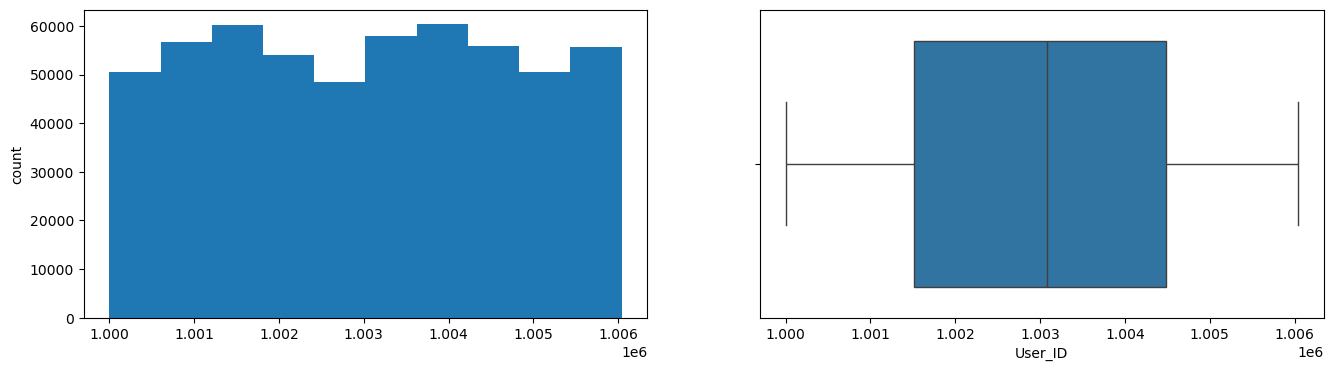

Occupation
Skewness: 0.4


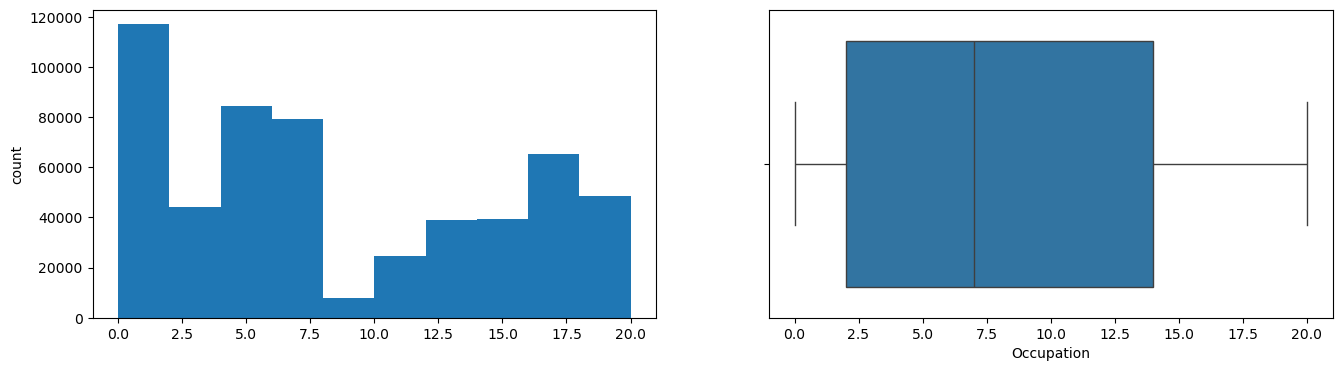

Marital_Status
Skewness: 0.37


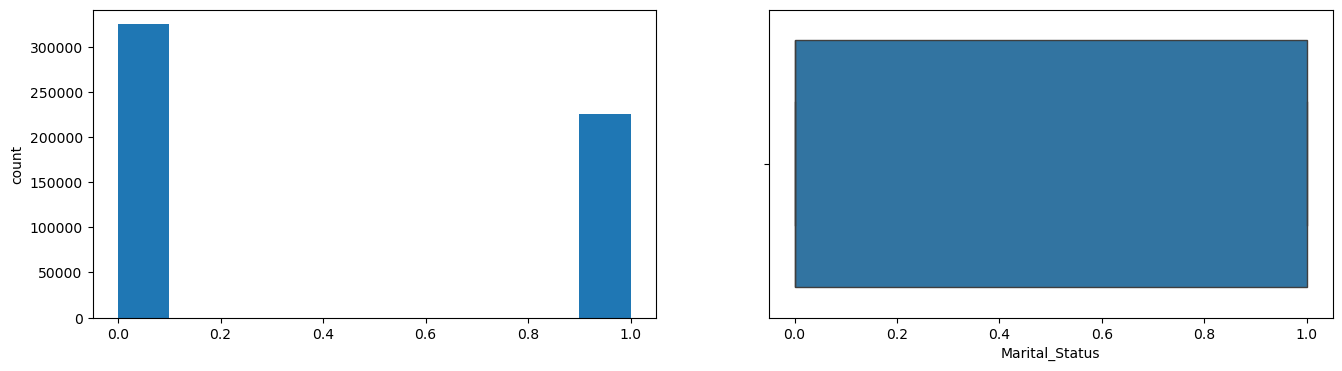

Product_Category_1
Skewness: 1.03


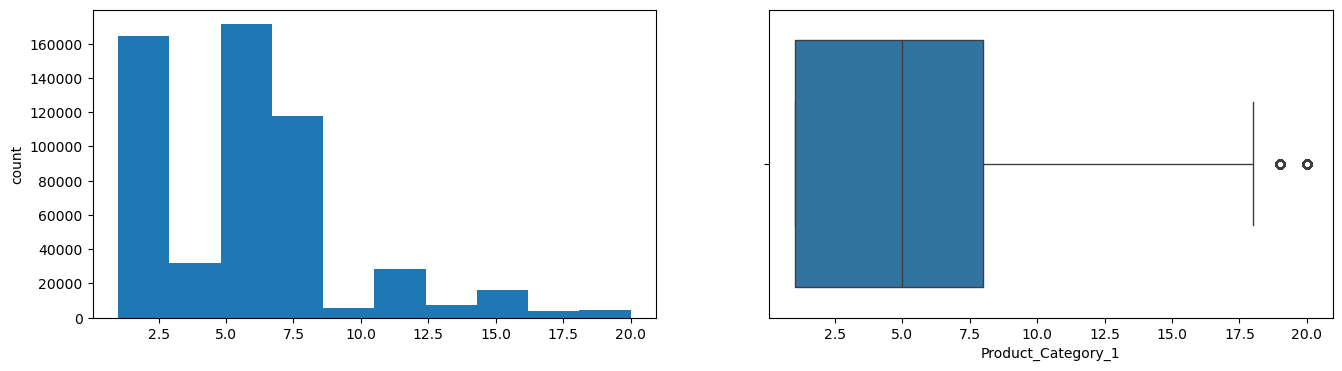

Product_Category_2
Skewness: 0.31


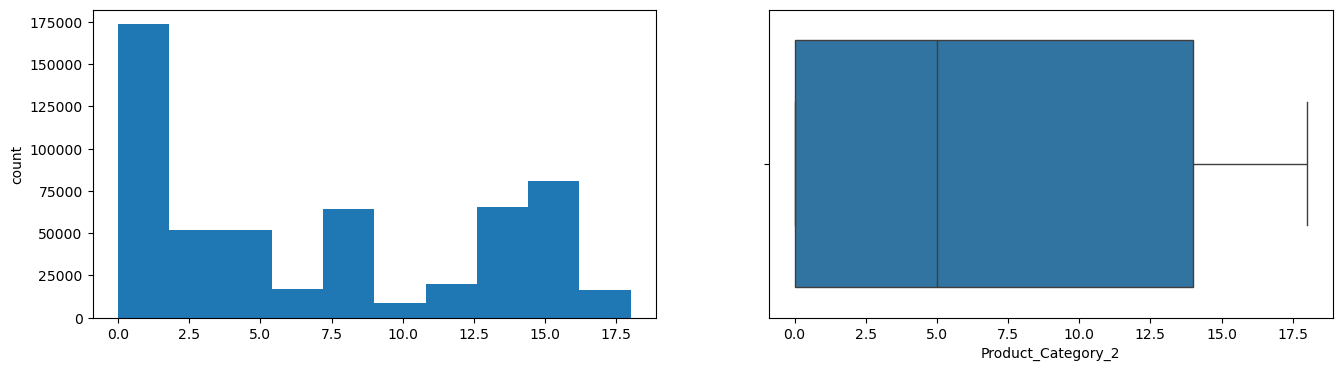

Product_Category_3
Skewness: 1.18


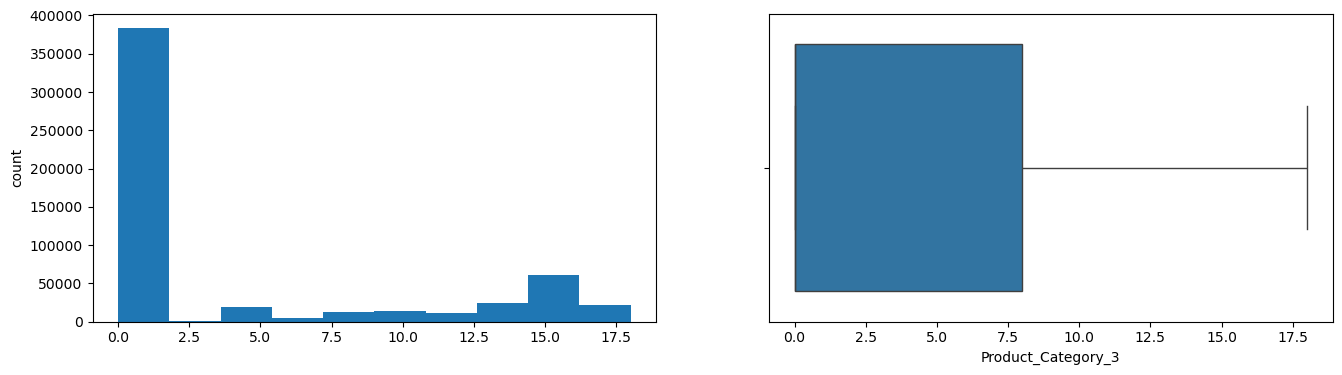

Purchase
Skewness: 0.6


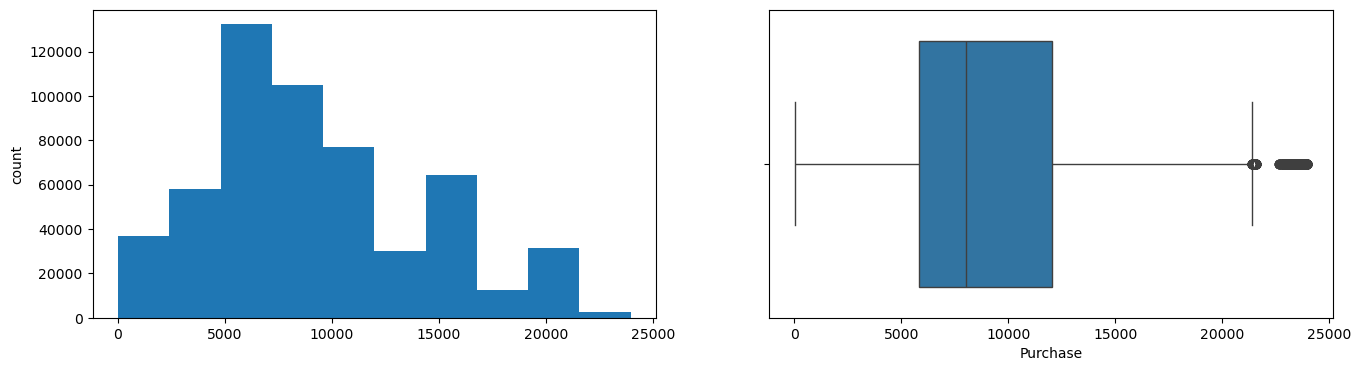

In [14]:
for col in num_col:
    print(col)
    print("Skewness:", round(data[col].skew(),2))
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

In [15]:
'''for col in cat_col:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
data'''

'for col in cat_col:\n    Q1=data[col].quantile(0.25)\n    Q3=data[col].quantile(0.75)\n    IQR=Q3-Q1\n    lower_bound=Q1-1.5*IQR\n    upper_bound=Q3+1.5*IQR\n    data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]\ndata'

<Axes: xlabel='Gender'>

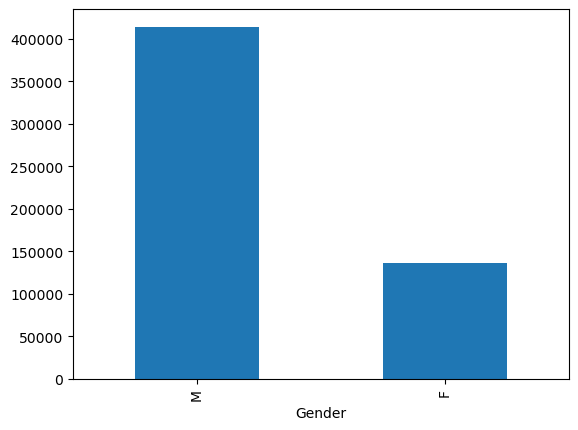

In [16]:
data['Gender'].value_counts().plot(kind='bar')

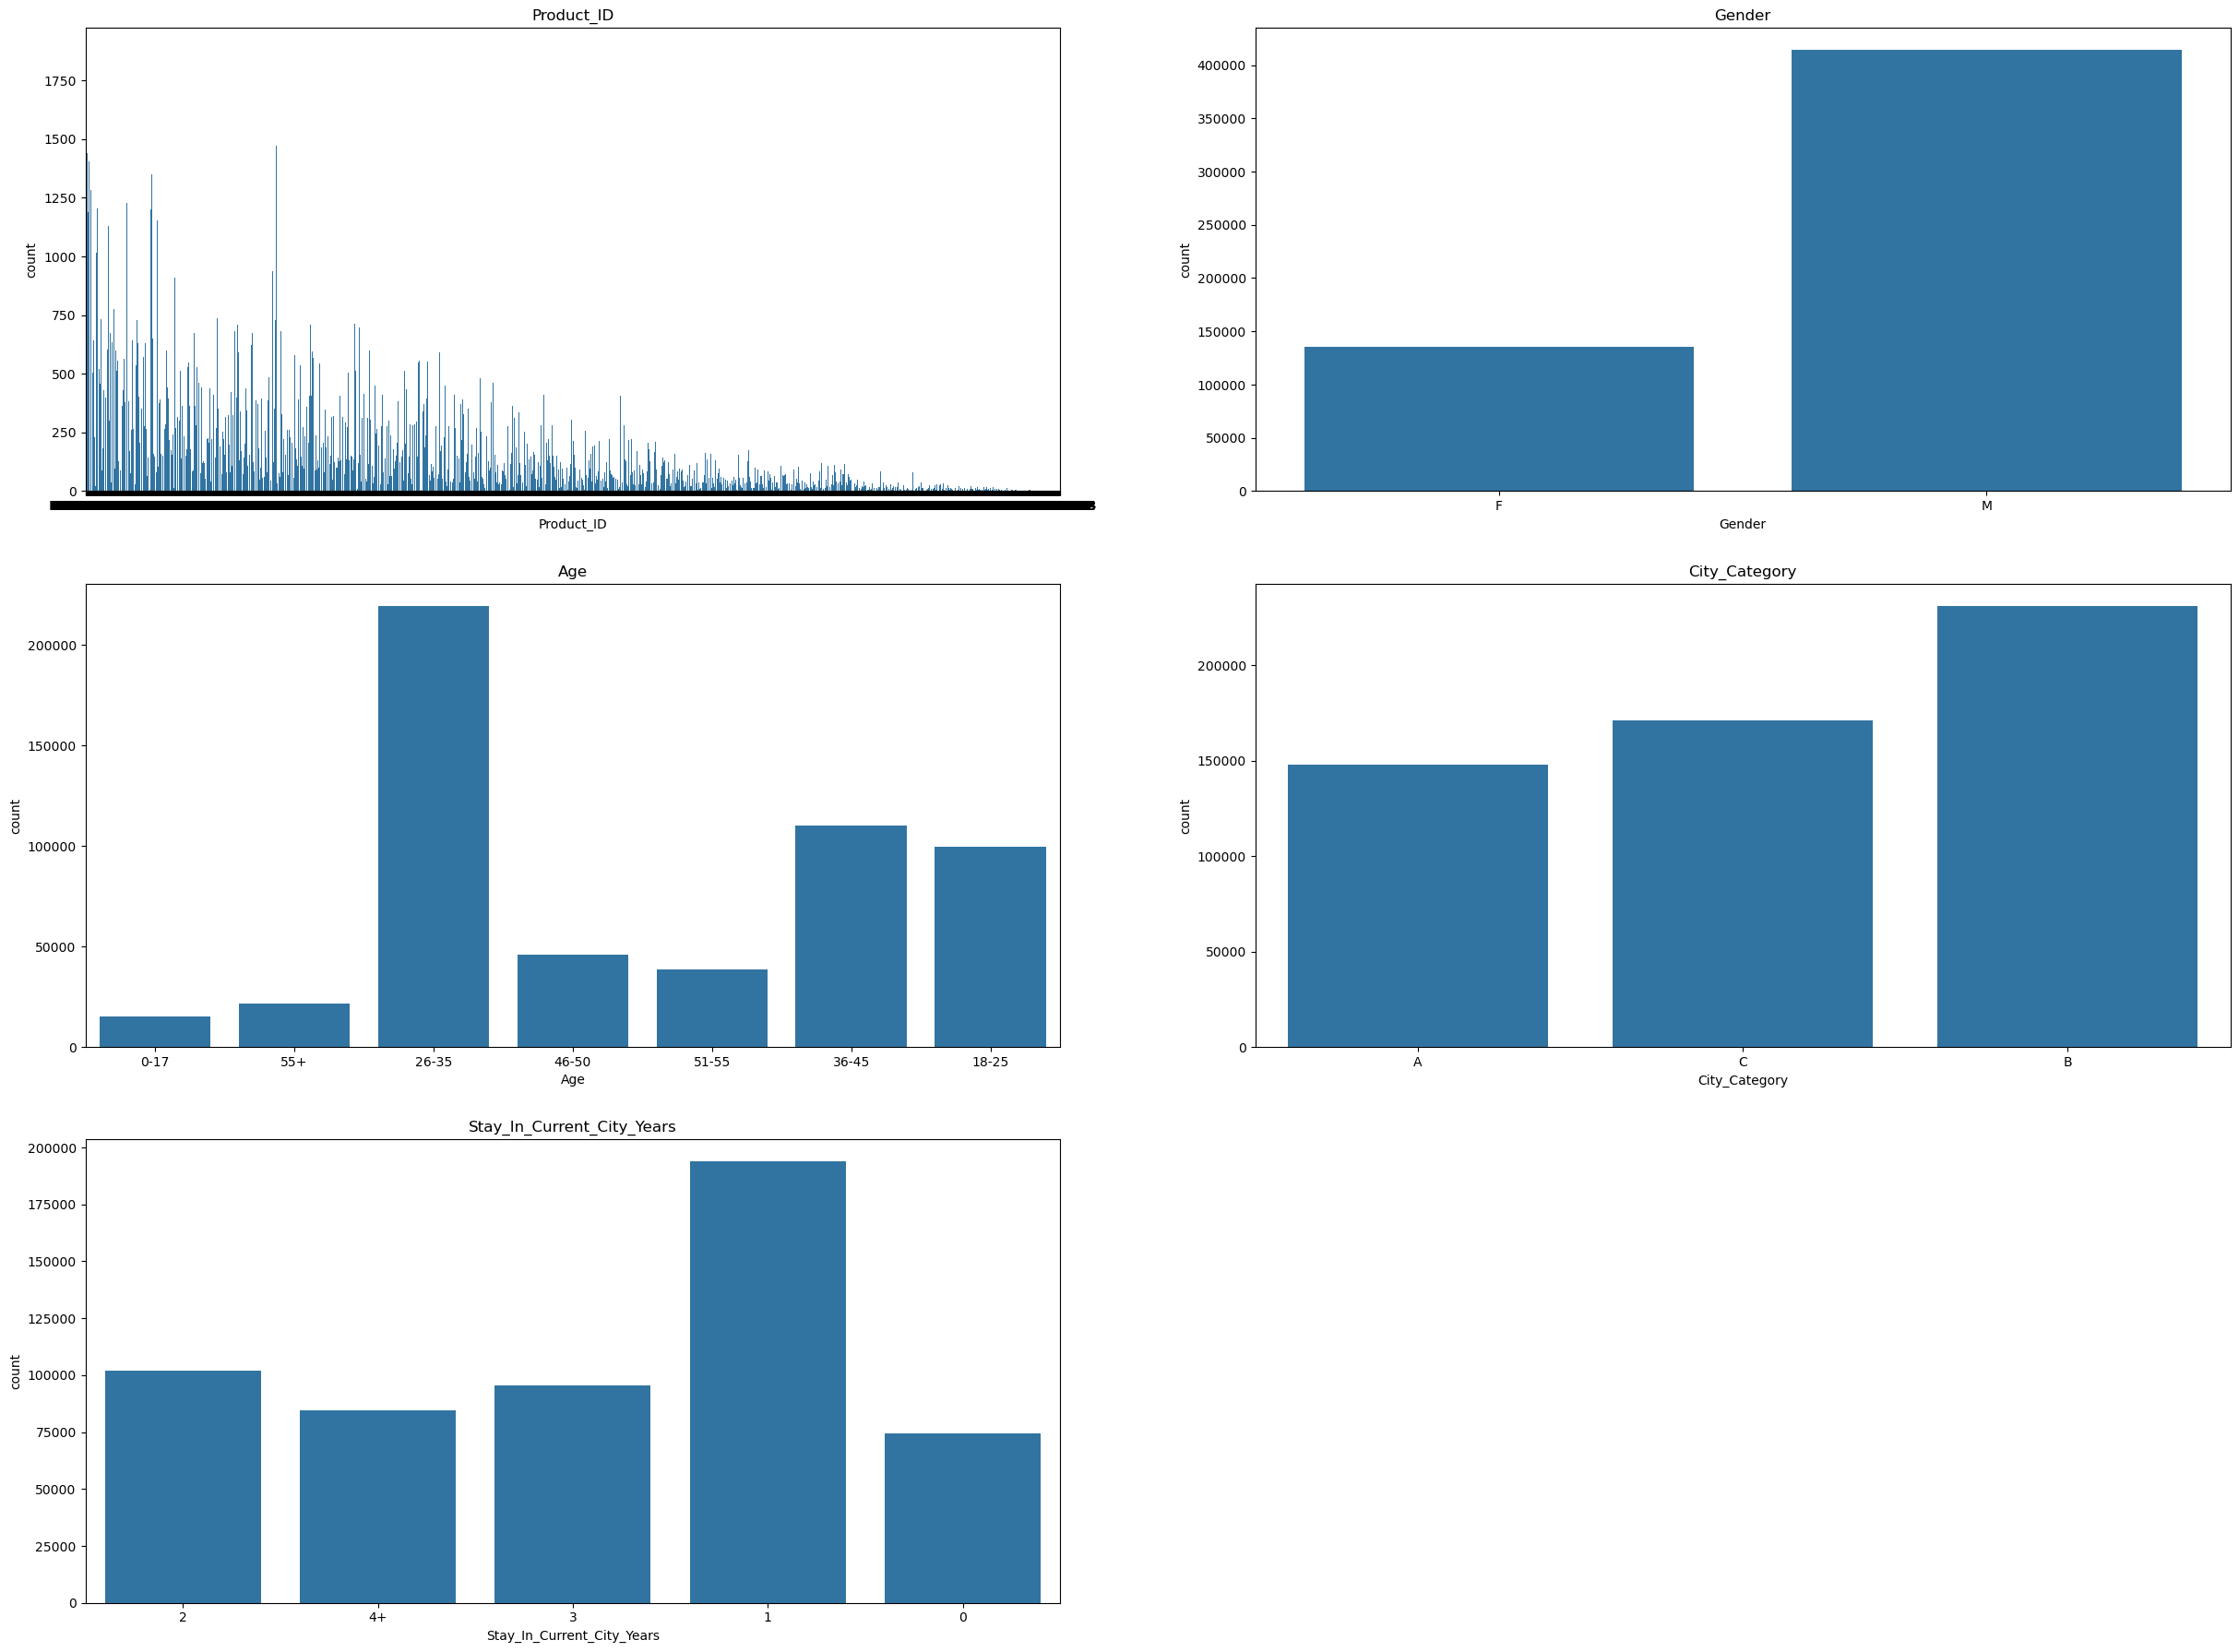

In [44]:
plt.figure(figsize= (30,30))
for i in range(len(cat_col)):
    plt.subplot(4,2,i+1)
    plt.title(cat_col[i])
    sns.countplot(x=data[cat_col[i]])

  
plt.show()

In [18]:
print(cat_col)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


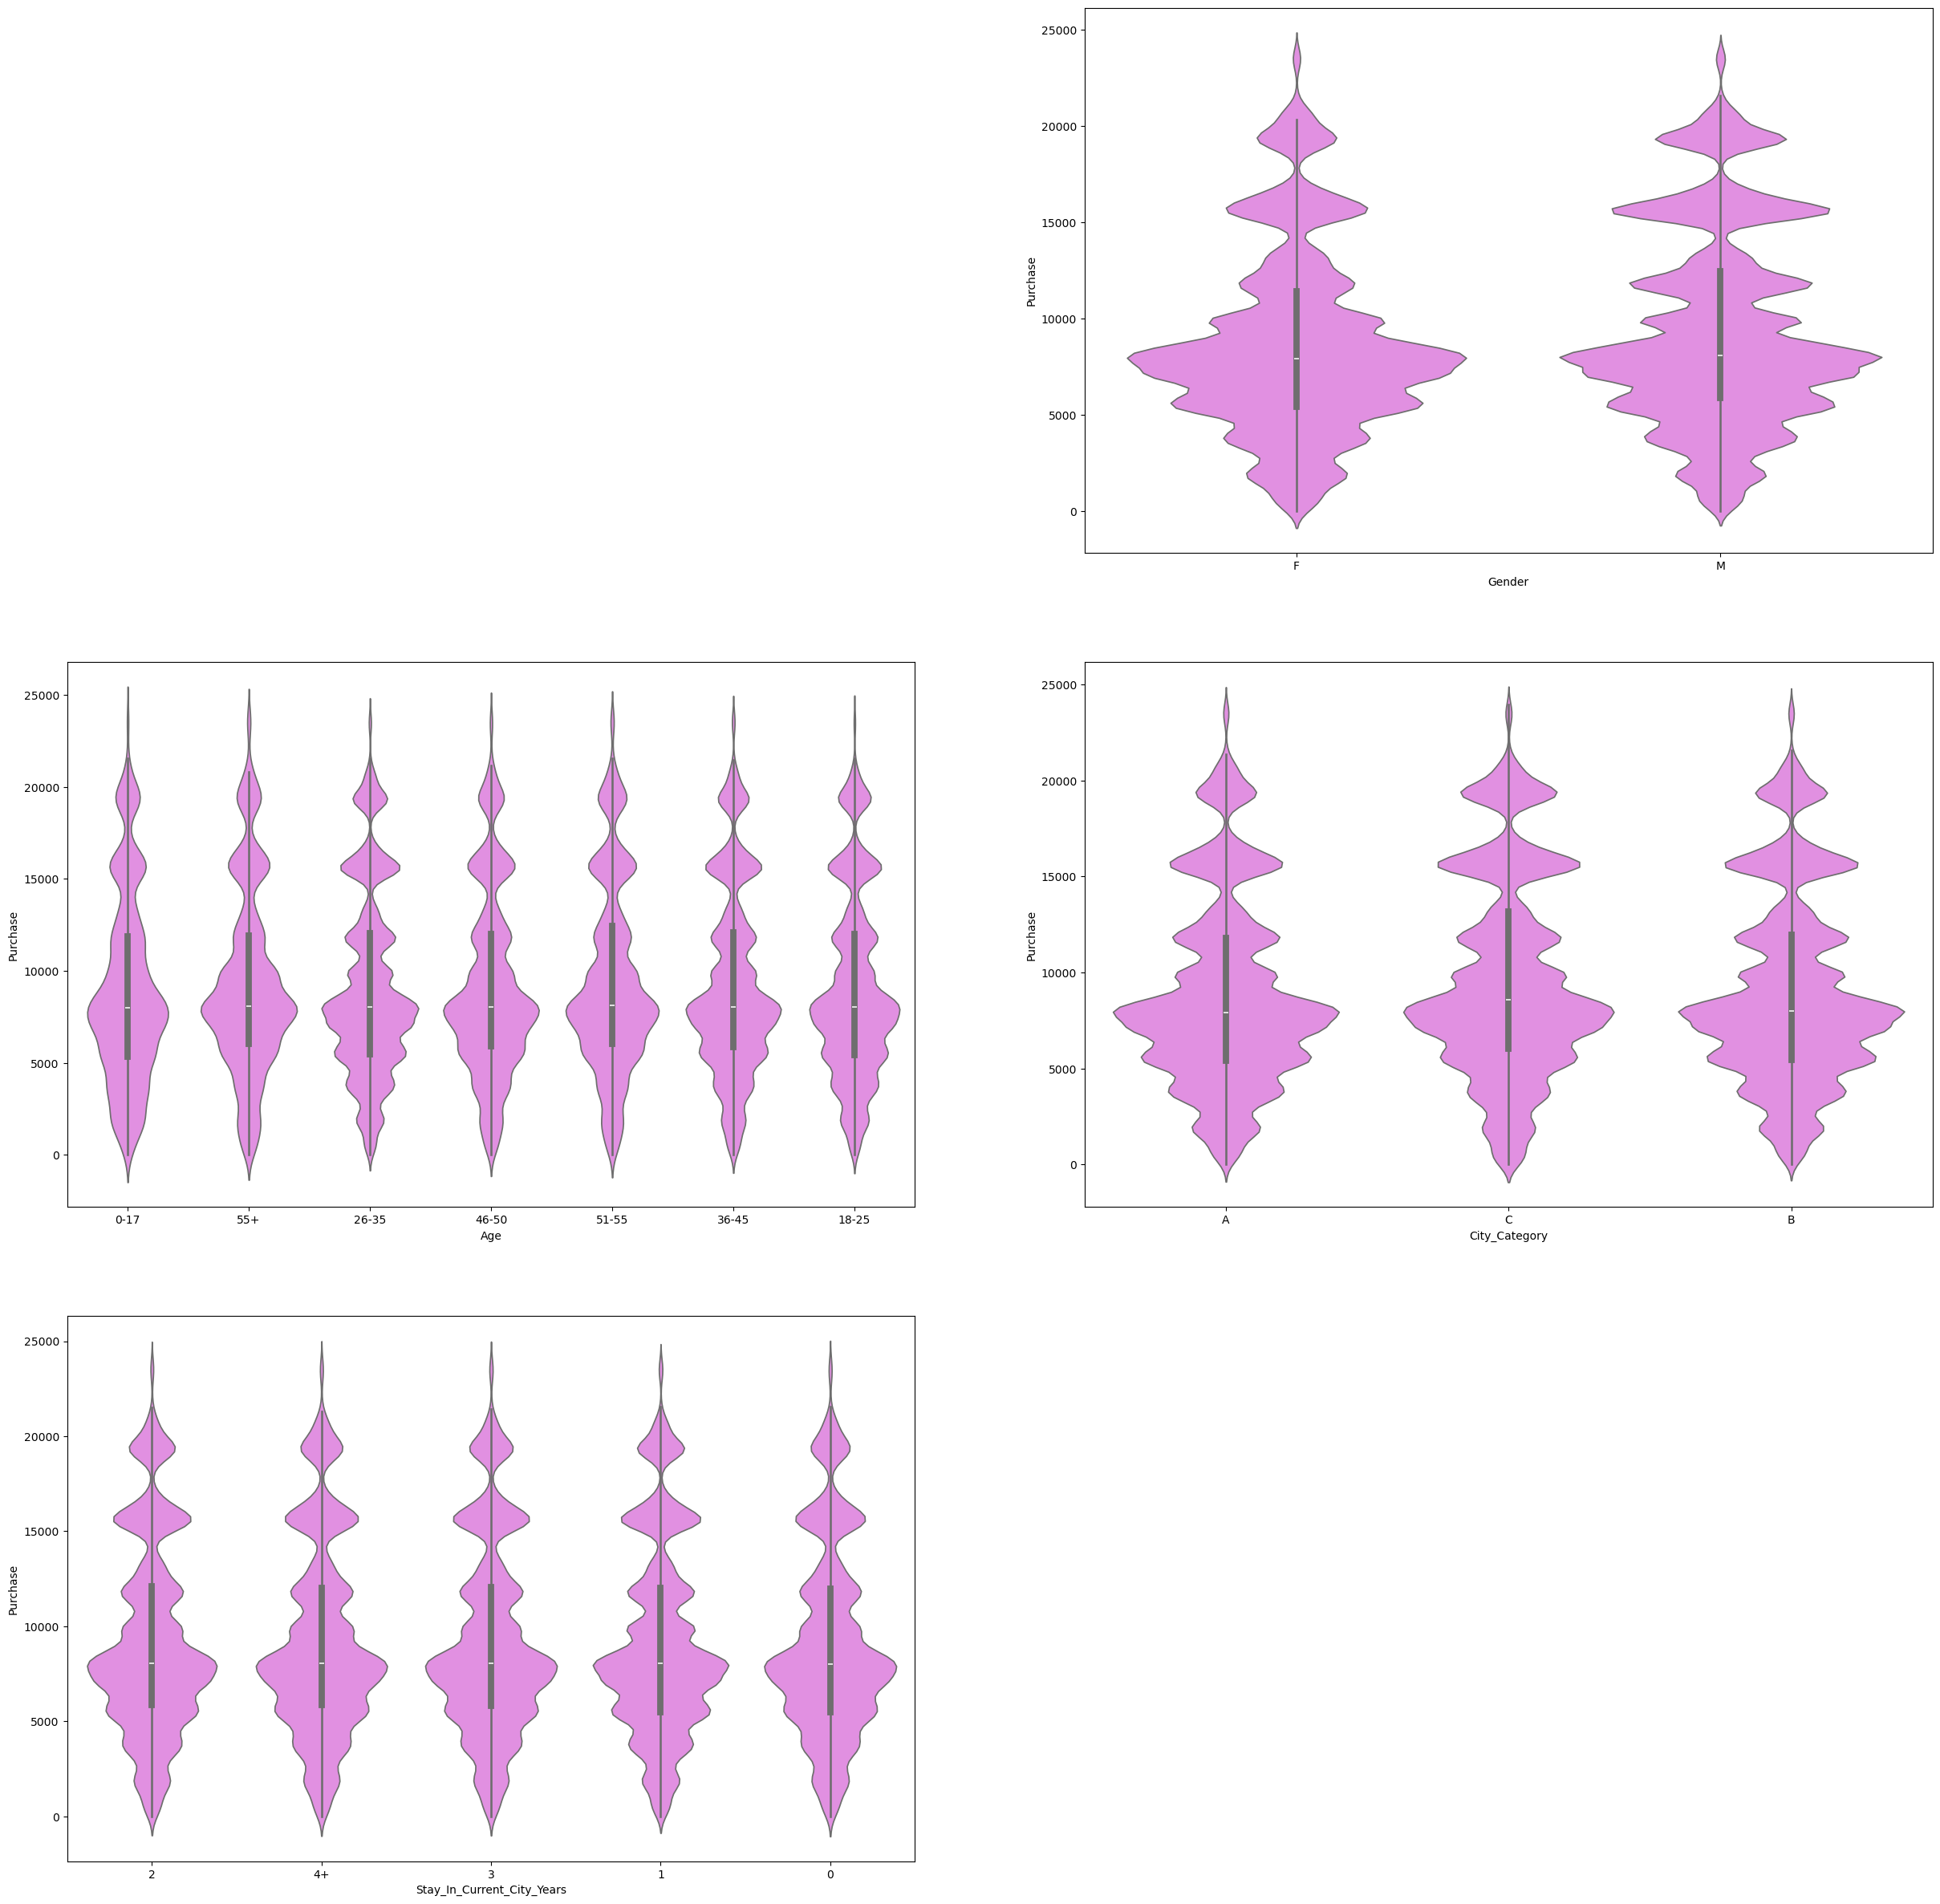

In [42]:
plt.figure(figsize=(30,30))
for i in range(1,5):
    plt.subplot(3,2,i+1)
    sns.violinplot(data,x=cat_col[i],y=data['Purchase'],color='violet')
plt.show()